In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.names

1. Title: Hepatitis Domain

2. Sources:
     (a) unknown
     (b) Donor: G.Gong  (Carnegie-Mellon University) via 
                   Bojan Cestnik
                   Jozef Stefan Institute
                   Jamova 39

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  3098    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  3098  100  3098    0     0   1989      0  0:00:01  0:00:01 --:--:--  1988



                   61000 Ljubljana
                   Yugoslavia (tel.: (38)(+61) 214-399 ext.287) }
     (c) Date: November, 1988

3. Past Usage:
    1. Diaconis,P. & Efron,B. (1983).  Computer-Intensive Methods in 
       Statistics.  Scientific American, Volume 248.
       -- Gail Gong reported a 80% classfication accuracy
    2. Cestnik,G., Konenenko,I, & Bratko,I. (1987). Assistant-86: A
       Knowledge-Elicitation Tool for Sophisticated Users.  In I.Bratko
       & N.Lavrac (Eds.) Progress in Machine Learning, 31-45, Sigma Press.
       -- Assistant-86: 83% accuracy

4. Relevant Information:
    Please ask Gail Gong for further information on this database.

5. Number of Instances: 155

6. Number of Attributes: 20 (including the class attribute)

7. Attribute information: 
     1. Class: DIE, LIVE
     2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
     3. SEX: male, female
     4. STEROID: no, yes
     5. ANTIVIRALS: no, yes
     6. FATIGUE: no, yes
     7. MALAISE: no, yes
     8. AN

In [3]:

PATH_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data"

# Save column names as a list
col_ls = ["Class", "AGE", "SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER BIG","LIVER FIRM","SPLEEN","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK PHOSPHATE","SGOT","ALBUMIN","PROTIME","HISTOLOGY"]

# Pass in col_ls into names parameter to explicitly name each column
df_url = pd.read_csv(PATH_URL,names=col_ls)
df_url['SEX'] = df_url['SEX'].astype(str)
df_url.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [4]:
print (df_url.dtypes)


Class             int64
AGE               int64
SEX              object
STEROID          object
ANTIVIRALS        int64
FATIGUE          object
MALAISE          object
ANOREXIA         object
LIVER BIG        object
LIVER FIRM       object
SPLEEN           object
SPIDERS          object
ASCITES          object
VARICES          object
BILIRUBIN        object
ALK PHOSPHATE    object
SGOT             object
ALBUMIN          object
PROTIME          object
HISTOLOGY         int64
dtype: object


In [5]:
df_url.shape

(155, 20)

In [6]:
df_url.describe()

,Class,AGE,ANTIVIRALS,HISTOLOGY
count,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.845161,1.451613
std,0.406070,12.565878,0.362923,0.499266
min,1.000000,7.000000,1.000000,1.000000
25%,2.000000,32.000000,2.000000,1.000000
50%,2.000000,39.000000,2.000000,1.000000
75%,2.000000,50.000000,2.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000


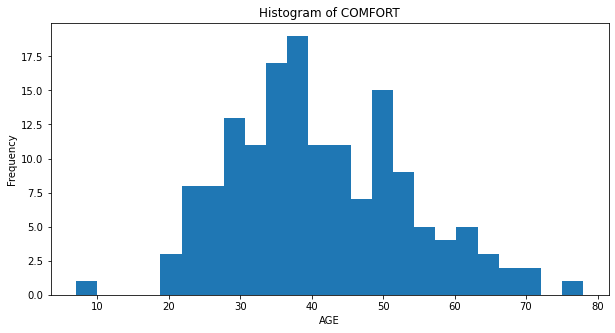

In [7]:
# Histogram plot
x = df_url["AGE"].values

plt.figure(figsize=(10,5))
plt.hist(x, bins=24)

plt.title("Histogram of COMFORT")
plt.ylabel("Frequency")
plt.xlabel("AGE")

plt.show()


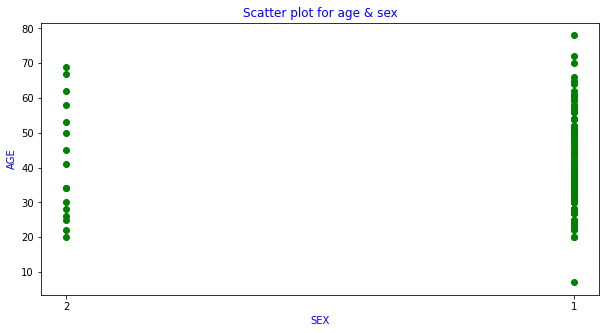

In [8]:
# Scatter plot
x = df_url["SEX"].values
y = df_url["AGE"].values

plt.figure(figsize=(10,5))
plt.scatter(x, y, color="g")

plt.title("Scatter plot for age & sex", c="b")
plt.xlabel("SEX", c="b")
plt.ylabel("AGE", c="b")

plt.show()

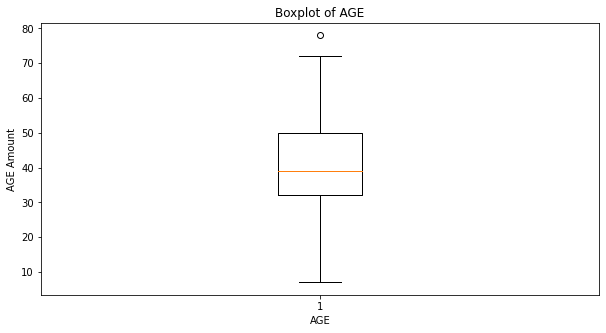

In [9]:
#Boxplot
x = df_url["AGE"].values

plt.figure(figsize=(10,5))
plt.boxplot(x)

plt.title("Boxplot of AGE")
plt.ylabel("AGE Amount")
plt.xlabel("AGE")

plt.show()

Text(0, 0.5, 'SGOT')

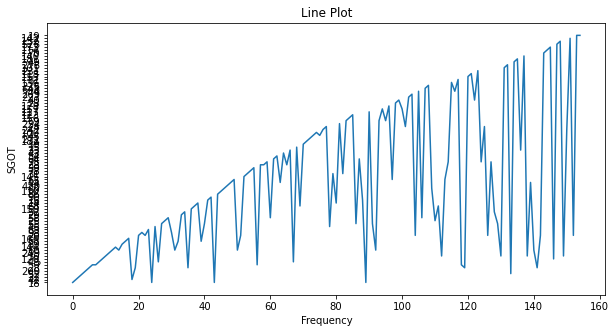

In [10]:
#line plot
x = df_url["SGOT"].values

plt.figure(figsize=(10,5))
plt.plot(x)

plt.title("Line Plot") 
plt.xlabel("Frequency")
plt.ylabel("SGOT")

In [11]:
#pie plot
type( df_url["SEX"].value_counts())

series = df_url["SEX"].value_counts()

print(series.values)
print(series.index)

[139  16]
Index(['1', '2'], dtype='object')


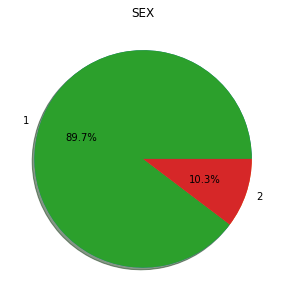

In [12]:
series = df_url["SEX"].value_counts() 

labels = series.index

values = series.values

plt.figure(figsize=(10,5))

plt.pie(values) 
plt.title("SEX")
plt.pie(values, labels = labels, shadow = True, autopct = '%1.1f%%')

plt.show()

Text(0, 0.5, 'HISTOLOGY')

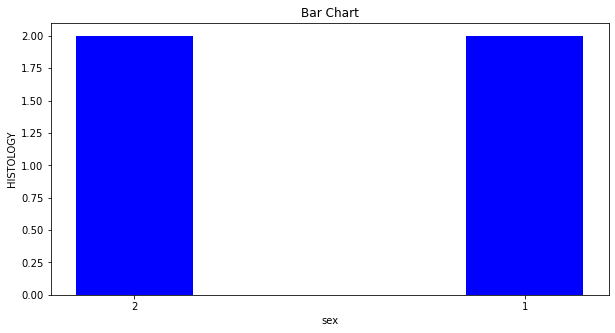

In [13]:
#bar plot
x = df_url["SEX"].values
y = df_url["HISTOLOGY"].values

plt.figure(figsize=(10,5))
plt.bar(x, y, color="b", width = 0.3) 

plt.title("Bar Chart", c="black") 
plt.xlabel("sex") 
plt.ylabel("HISTOLOGY")